<a href="https://colab.research.google.com/github/luca-arts/seeingtheimperceptible/blob/main/notebooks/superResolution/tests/Super_Resolution_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Super Resolution OpenCV

[code](https://github.com/spmallick/learnopencv/tree/master/Super-Resolution-in-OpenCV) [blog](https://learnopencv.com/super-resolution-in-opencv/)

1. Preparing setup 

In [1]:
!nvidia-smi

# install openCV ≥ 4.3
!pip install opencv-contrib-python --upgrade

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.

     |████████████████████████████████| 66.7 MB 19 kB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


2. linking nextcloud

In [2]:
# we'll link the dataset from next-cloud
!curl https://raw.githubusercontent.com/luca-arts/seeingtheimperceptible/main/notebooks/database_mod.py -o /content/database_mod.py

from database_mod import *

link_nextcloud()

nextcloud = '/content/database/'

input_folder, output_folder = create_io(database=nextcloud,topic='superResolution',library='EDSR')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2235  100  2235    0     0  19267      0 --:--:-- --:--:-- --:--:-- 19267
what's the username for nextcloud? colab
what's the password for user colab? ··········
0
Please enter the username to authenticate with server
https://cloud.bxlab.net/remote.php/dav/files/colab/colabfiles/ or hit enter for none.
  Username: Please enter the password to authenticate user colab with server
https://cloud.bxlab.net/remote.php/dav/files/colab/colabfiles/ or hit enter for none.
  Password:  
content of /etc/fstab: https://cloud.bxlab.net/remote.php/dav/files/colab/colabfiles/ /content/database davfs user,rw,auto 0 0


3. Reading the input folder

4.5.5


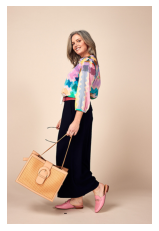

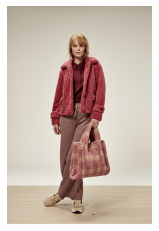

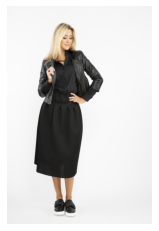

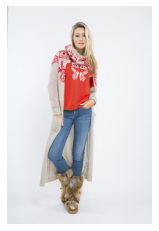

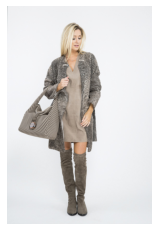

In [6]:
import cv2
import glob, os
import PIL.Image
import matplotlib.pyplot as plt

# check version openCV
#print(cv2.__version__)

# define model_path
model_path = nextcloud + '/content/database/superResolution/models'

# define the images from the input_folder
SR_files = glob.glob(input_folder + '/*.jpg')
SR_files.sort()
for file in SR_files:
    #print("Reading Image ::: " + file)
    img = cv2.imread(file)

    plt.imshow(img[:,:,::-1])
    plt.axis('off')
    plt.show()

4. linking the EDSR

In [ ]:
# implement DNN model
sr = cv2.dnn_superres.DnnSuperResImpl_create()

# model
path = "EDSR_x4.pb"

# init model
sr.readModel(path)
sr.setModel("edsr",4)

result = sr.upsample(img)

# Resized image
resized = cv2.resize(img,dsize=None,fx=4,fy=4)

plt.figure(figsize=(12,8))
plt.subplot(1,3,1)

# Original image
plt.imshow(img[:,:,::-1])
plt.subplot(1,3,2)

# SR upscaled
plt.imshow(result[:,:,::-1])
plt.subplot(1,3,3)

# OpenCV upscaled
plt.imshow(resized[:,:,::-1])
plt.show()
